In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd

♫♫♫ > DUET LIVE STATUS  -  Objects: 20  Requests: 0   Messages: 5542  Request Handlers: 1                                

In [ ]:
## cd
import os
path = os.getcwd()
print(path)

In [68]:
import syft as sy

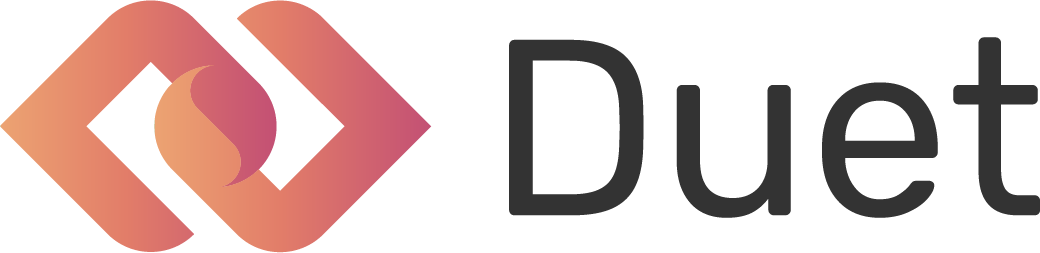

[2021-09-17T04:03:07.031227+0900][CRITICAL][logger]][68548] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 63868fda67ae4fd29db6e2f4a086b283>.
[2021-09-17T04:03:07.110709+0900][CRITICAL][logger]][68548] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 962c3b89833e43229b535c18acff7ca0>.
[2021-09-17T04:03:07.138661+0900][CRITICAL][logger]][68548] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 67c5122de0e949ad9c4dc43b8c870ce3>.


In [83]:
duet = sy.launch_duet(loopback=True)

In [72]:
from ptranking.data.data_utils import LTRDataset, SPLIT_TYPE
data_id = 'MQ2007_Super'
file_train = 'train.txt'
file_test = 'test.txt'
train_dataset = LTRDataset(SPLIT_TYPE.Train, data_id=data_id, file=file_train, batch_size=1, shuffle=True, presort=True, data_dict=None, eval_dict=None, buffer=False)
test_dataset = LTRDataset(SPLIT_TYPE.Test, data_id=data_id, file=file_test, batch_size=1, shuffle=True, presort=True, data_dict=None, eval_dict=None, buffer=False)

In [52]:
train_dataset[0][1].size()

torch.Size([1, 40, 46])

In [53]:
train_dataset[0][2].size()

torch.Size([1, 40])

In [73]:
# training dataset
tr_score = []
tr_label = []
for i in range(len(train_dataset)):
    _, batch_ranking, std_label = train_dataset[i]
    if batch_ranking.size()[1] == 40:
        tr_score.append(batch_ranking)
        tr_label.append(std_label)

In [55]:
# test dataset
ts_score = []
ts_label = []
for i in range(len(test_dataset)):
    _, batch_ranking, std_label = test_dataset[i]
    if batch_ranking.size()[1] == 40:
        ts_score.append(batch_ranking)
        ts_label.append(std_label)

In [84]:
s_12 = tr_score[:5]
l_12 = tr_label[:5]

In [85]:
tr_score_tensor = torch.cat(s_12, dim=0)
tr_label_tensor = torch.cat(l_12, dim=0)

In [98]:
tr_score_tensor = torch.cat(tr_score, dim=0)
tr_label_tensor = torch.cat(tr_label, dim=0)

In [99]:
ts_score_tensor = torch.cat(ts_score, dim=0)
ts_label_tensor = torch.cat(ts_label, dim=0)

In [212]:
print(tr_score_tensor.size())
print(tr_label_tensor.size())
print(ts_score_tensor.size())
print(ts_label_tensor.size())

In [130]:
tr_score_tensor = torch.randn(2,40,46)
tr_label_tensor = torch.randn(2,40)
ts_score_tensor = torch.randn(1,40,46)
ts_label_tensor = torch.randn(1,40)

♫♫♫ > DUET LIVE STATUS  *  Objects: 21  Requests: 0   Messages: 9576  Request Handlers: 1                                 

In [180]:
print(tr_score_tensor.size())
print(tr_label_tensor.size())
print(ts_score_tensor.size())
print(ts_label_tensor.size())

torch.Size([50, 40, 46])
torch.Size([50, 40])
torch.Size([1, 40, 46])
torch.Size([1, 40])


In [86]:
# tag and describe about training data
tr_score_sy = tr_score_tensor.tag("train score")
tr_score_sy = tr_score_tensor.describe("ranking score of training data")

tr_label_sy = tr_label_tensor.tag("train label")
tr_label_sy = tr_label_tensor.describe("label of training data")

In [59]:
# tag and describe about test data
ts_score_sy = ts_score_tensor.tag("test score")
ts_score_sy = ts_score_tensor.describe("ranking score of test data")

ts_label_sy = ts_label_tensor.tag("test label")
ts_label_sy = ts_label_tensor.describe("label of test data")

NameError: name 'ts_score_tensor' is not defined

In [87]:
# send training data
tr_score_pointer = tr_score_sy.send(duet, searchable=True)
tr_label_pointer = tr_label_sy.send(duet, searchable=True)
# send test data
#ts_score_pointer = ts_score_sy.send(duet, searchable=True)
#ts_label_pointer = ts_label_sy.send(duet, searchable=True)

In [88]:
duet.store

[<syft.proxy.torch.TensorPointer object at 0x7fbbffb08160>, <syft.proxy.torch.TensorPointer object at 0x7fbbffb08320>]

In [89]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: cfb128f904664d0c85e1fa960ff91d66>,[train score],ranking score of training data,<class 'torch.Tensor'>
1,<UID: a5eb2ea4aeaa465da06aef638878d4ec>,[train label],label of training data,<class 'torch.Tensor'>


In [91]:
duet.requests.add_handler(action="accept")

In [ ]:
duet.requests.add_handler(action="accept")

In [112]:
layers = [nn.Linear(46, 128),
          nn.ReLU(),
          nn.Linear(128, 64),
          nn.ReLU(),
          nn.Linear(64, 32),
          nn.ReLU(),
          nn.Linear(32, 1)]

[2021-09-01T19:56:41.526936+0900][CRITICAL][logger]][2298] Error(s) in loading state_dict for Sequential:
	Unexpected key(s) in state_dict: "0.weight", "0.bias", "2.weight", "2.bias", "4.weight", "4.bias", "6.weight", "6.bias". 
[2021-09-01T19:56:41.530800+0900][CRITICAL][logger]][2298] Error(s) in loading state_dict for Sequential:
	Unexpected key(s) in state_dict: "0.weight", "0.bias", "2.weight", "2.bias", "4.weight", "4.bias", "6.weight", "6.bias". 
Exception in callback AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe... "6.bias". ')>) at /Users/kanazawaatsuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pyee/_asyncio.py:55
handle: <Handle AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe... "6.bias". ')>) at /Users/kanazawaatsuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pyee/_asyncio.py:55>
Traceback (most recent call last):
  File "/Users/kanazawaatsuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/asyncio/events.py", 

In [17]:
class RankNet(nn.Module):
    def __init__(self, layers):
        super(RankNet, self).__init__()
        self.model = nn.Sequential(*layers)
        
    def forward(self, batch_ranking, label):
        batch_pred = self.model(batch_ranking) # [40, 1]
        batch_sij = batch_pred - batch_pred.view(-1, 40) # [40, 40]
        
        label_diffs = label.unsqueeze(1) - label.view(-1, 40) 
        batch_Sij = torch.clamp(label_diffs, -1, 1) # [40, 40]
        
        # computes p_ij
        batch_pij = 1 / (1 + torch.exp(-batch_sij)) # [40, 40]
                
        # computes loss
        batch_loss = 0.5 * (1-batch_Sij) * batch_sij + torch.log(1+torch.exp(-batch_sij)) #[40, 40]
                
        # make upper triangular matrix
        batch_loss_triu = torch.triu(batch_loss, diagonal=1)

        # computes the mean value of a
        num_elements = (batch_loss_triu.size(1)*batch_loss_triu.size(1)-batch_loss_triu.size(1))/2
        batch_loss_mean = torch.sum(batch_loss_triu)/num_elements
        
        #loss_list.append(batch_loss_mean)
                
        #print("batch_loss_mean", batch_loss_mean)
        
        return batch_loss_mean
    
    def predict(self, x):
        return self.model(x)

In [ ]:
tr_score_tensor = torch.randn(2,40,46)
tr_label_tensor = torch.randn(2,40)
ts_score_tensor = torch.randn(1,40,46)
ts_label_tensor = torch.randn(1,40)

In [242]:
a=model.predict(tr_score_tensor[0])
a.size()

torch.Size([40, 1])

In [249]:
b=a.view(-1,40)
a-b

tensor([[ 0.0000, -0.0393, -0.0196,  ..., -0.0050, -0.0254, -0.0052],
        [ 0.0393,  0.0000,  0.0196,  ...,  0.0343,  0.0139,  0.0340],
        [ 0.0196, -0.0196,  0.0000,  ...,  0.0147, -0.0057,  0.0144],
        ...,
        [ 0.0050, -0.0343, -0.0147,  ...,  0.0000, -0.0204, -0.0003],
        [ 0.0254, -0.0139,  0.0057,  ...,  0.0204,  0.0000,  0.0202],
        [ 0.0052, -0.0340, -0.0144,  ...,  0.0003, -0.0202,  0.0000]],
       grad_fn=<SubBackward0>)

In [268]:
def DCG(sorted_labels, cutoff):
    denoms = torch.log2(torch.arange(2, cutoff+2))
    nums = torch.pow(2, sorted_labels[0:cutoff])-1
    dcg = sum(nums / denoms)
    return dcg

def nDCG(ideal, pred, k):
    dcg_f = DCG(pred, k)
    dcg = DCG(ideal, k)
    nDCG = dcg_f / dcg
    return nDCG

def compute_ndcg(rank,label,cutoff):     
    t = model.predict(rank)
    r = torch.argsort(t,dim=1,descending = True)
    ideal,_ = torch.sort(label,1,descending = True)
    ideal = torch.unsqueeze(ideal,2).reshape(-1)
    pred = torch.gather(label.unsqueeze(2),1,r).reshape(-1)
    ndcg = torch.nan_to_num(nDCG(ideal,pred,cutoff))
    return ndcg

In [262]:
compute_ndcg(tr_score_tensor, tr_label_tensor, 5)

tensor(0.0782)

In [263]:
len(tr_score_tensor)

925

In [19]:
def training_loop(n_epochs,optimizer,model,train_score,train_label,test_score,test_label):
    
    losses = []
    
    # モデルの訓練
    for epoch in range(1, n_epochs + 1):
        
        # クエリごとの訓練
        batch_loss = 0
        batch_ndcg = 0
            
        for train_query in range(len(train_score)):
            
            batch_loss += model.forward(batch_ranking=train_score[train_query], label=train_label[train_query])
            #batch_ndcg += compute_ndcg(train_score[train_query],train_label[train_query],5)
                    
        fold_loss_mean = batch_loss / len(train_score)
        losses.append(fold_loss_mean)
        #fold_ndcg_mean = batch_ndcg / len(train_score)
        
        optimizer.zero_grad()
        fold_loss_mean.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 10 == 0:
            print('epoch:{0}, loss:{1}'.format(epoch, fold_loss_mean))
              
    # test
    with torch.no_grad():
        test_ndcg = 0
        test_loss = 0
        for test_query in range(len(test_score)):
        #computes ndcg
            test_loss += model.forward(batch_ranking=test_score[test_query], label=test_label[test_query])
            #test_ndcg += compute_ndcg(test_score[test_query],test_label[test_query],5)
                  
        #test_ndcg_mean = test_ndcg / len(test_score)
        test_loss_mean = test_loss / len(test_score)
        
        print('loss:{0}'.format(test_loss_mean))
        
    return losses

In [270]:
# クラスのインスタンス化
model = RankNet(layers)

In [20]:
losses = training_loop(
    n_epochs = 50,
    optimizer = torch.optim.SGD(model.parameters(),lr = 0.01),
    model = model,
    train_score = tr_score_tensor,
    train_label = tr_label_tensor,
    test_score = ts_score_tensor,
    test_label = ts_label_tensor,
)

NameError: name 'model' is not defined

[2021-08-14T09:55:37.910295+0900][CRITICAL][logger]][1322] Error(s) in loading state_dict for Sequential:
	Unexpected key(s) in state_dict: "0.weight", "0.bias", "2.weight", "2.bias", "4.weight", "4.bias", "6.weight", "6.bias". 
[2021-08-14T09:55:37.912879+0900][CRITICAL][logger]][1322] Error(s) in loading state_dict for Sequential:
	Unexpected key(s) in state_dict: "0.weight", "0.bias", "2.weight", "2.bias", "4.weight", "4.bias", "6.weight", "6.bias". 
Exception in callback AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe... "6.bias". ')>) at /Users/kanazawaatsuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pyee/_asyncio.py:55
handle: <Handle AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe... "6.bias". ')>) at /Users/kanazawaatsuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pyee/_asyncio.py:55>
Traceback (most recent call last):
  File "/Users/kanazawaatsuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/asyncio/events.py", 

In [217]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'iteration')

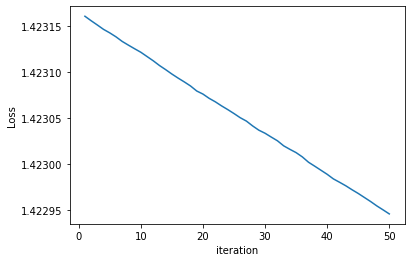

In [272]:
plt.plot(range(1, 50+1), losses)
plt.ylabel("Loss")
plt.xlabel("iteration")